# Data Exploration

Here, I'm going to explore creating heatmaps of where crimes occured. 

To do this, I found this Kaggle script written in R that I pulled inspiration from [this script.](https://www.kaggle.com/ldocao/sf-crime/population-density-heat-map/code). I also found [this](https://www.kaggle.com/ldocao/sf-crime/population-density-heat-map) python scipt that proved helpful. 


First, I got data about the police districts in San Franscisco. 

## Importing Everything

In [1]:
% matplotlib inline
import shapefile
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import cm
from datetime import datetime
from IPython.html import widgets


/Users/Sophia/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Read in Data
Also, here, I'm converting the timestamp to a timetime object, as well as years, months, days, and hours

In [2]:
crimeData = pd.read_csv('train.csv')

crimeData['DateTime'] = crimeData['Dates'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

crimeData['Year'] = crimeData['DateTime'].apply(lambda x: x.year)
crimeData['Month'] = crimeData['DateTime'].apply(lambda x: x.month)
crimeData['Day'] = crimeData['DateTime'].apply(lambda x: x.day)
crimeData['Hour'] = crimeData['DateTime'].apply(lambda x: x.hour)

crimeData

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DateTime,Year,Month,Day,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,2015,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,2015,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13 23:33:00,2015,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13 23:30:00,2015,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13 23:30:00,2015,5,13,23
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015-05-13 23:30:00,2015,5,13,23
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015-05-13 23:30:00,2015,5,13,23
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015-05-13 23:30:00,2015,5,13,23
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,2015-05-13 23:00:00,2015,5,13,23
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,2015-05-13 23:00:00,2015,5,13,23


## Get Count of Crimes by District 
Here, I'm going to create a dataframe of police district -> counts of different types of crimes by some time interval (I want to see how the types of arrests change over time)


In [3]:
groupedByDistrict = crimeData.groupby(['PdDistrict','Year','Category']).count().reset_index()
groupedByDistrict

,PdDistrict,Year,Category,Dates,Descript,DayOfWeek,Resolution,Address,X,Y,DateTime,Month,Day,Hour
0,BAYVIEW,2003,ARSON,47,47,47,47,47,47,47,47,47,47,47
1,BAYVIEW,2003,ASSAULT,865,865,865,865,865,865,865,865,865,865,865
2,BAYVIEW,2003,BAD CHECKS,5,5,5,5,5,5,5,5,5,5,5
3,BAYVIEW,2003,BRIBERY,1,1,1,1,1,1,1,1,1,1,1
4,BAYVIEW,2003,BURGLARY,356,356,356,356,356,356,356,356,356,356,356
5,BAYVIEW,2003,DISORDERLY CONDUCT,31,31,31,31,31,31,31,31,31,31,31
6,BAYVIEW,2003,DRIVING UNDER THE INFLUENCE,8,8,8,8,8,8,8,8,8,8,8
7,BAYVIEW,2003,DRUG/NARCOTIC,481,481,481,481,481,481,481,481,481,481,481
8,BAYVIEW,2003,DRUNKENNESS,18,18,18,18,18,18,18,18,18,18,18
9,BAYVIEW,2003,EMBEZZLEMENT,13,13,13,13,13,13,13,13,13,13,13


In [4]:
crimeCountByDistrict = groupedByDistrict[groupedByDistrict.Category == 'ASSAULT']
crimeCountByDistrict

,PdDistrict,Year,Category,Dates,Descript,DayOfWeek,Resolution,Address,X,Y,DateTime,Month,Day,Hour
1,BAYVIEW,2003,ASSAULT,865,865,865,865,865,865,865,865,865,865,865
36,BAYVIEW,2004,ASSAULT,919,919,919,919,919,919,919,919,919,919,919
72,BAYVIEW,2005,ASSAULT,690,690,690,690,690,690,690,690,690,690,690
106,BAYVIEW,2006,ASSAULT,811,811,811,811,811,811,811,811,811,811,811
142,BAYVIEW,2007,ASSAULT,733,733,733,733,733,733,733,733,733,733,733
179,BAYVIEW,2008,ASSAULT,767,767,767,767,767,767,767,767,767,767,767
215,BAYVIEW,2009,ASSAULT,765,765,765,765,765,765,765,765,765,765,765
251,BAYVIEW,2010,ASSAULT,771,771,771,771,771,771,771,771,771,771,771
289,BAYVIEW,2011,ASSAULT,813,813,813,813,813,813,813,813,813,813,813
325,BAYVIEW,2012,ASSAULT,844,844,844,844,844,844,844,844,844,844,844


## Creating Plot of Crimes by Police District
Here, I'm going to plot the number of crimes that occurred in each police district. 

Here, I'm reading in the shapefile and plotting the neighborhoods

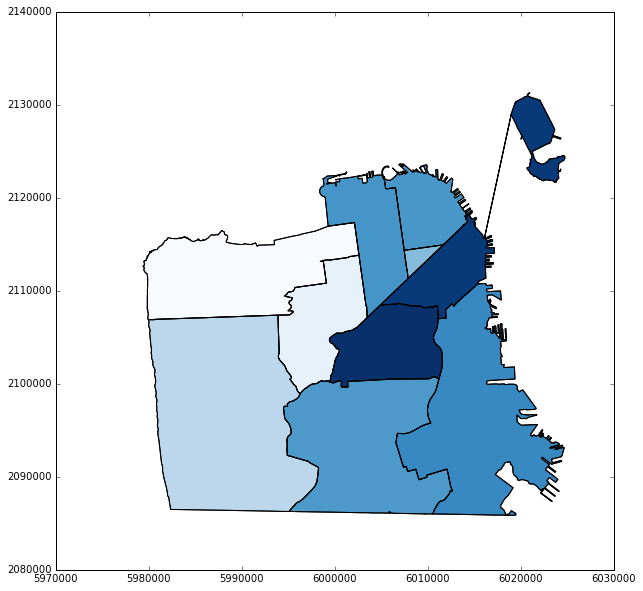

In [11]:
sf = shapefile.Reader("./sfpd_districts/sfpd_districts.shp")

policeDistricts = sf.shapeRecords()
numDistricts = len(policeDistricts)

CrimesYearsDict = {}

districtOrder = []
districtShapes = []
districtOutlines = []

for district in policeDistricts:
    
    xDistrict = [i[0] for i in district.shape.points[:]]
    yDistrict = [i[1] for i in district.shape.points[:]]
    
    districtOrder.append(district.record[1])
#     print(district.record)

    districtPolygon = Polygon(np.array([xDistrict,yDistrict]).T, closed=True) #get one single polygon
    districtShapes.append(districtPolygon)
    districtOutlines.append((xDistrict,yDistrict))



for year in crimeCountByDistrict.Year.unique().tolist():
    districtColors = []
    for district in districtOrder:
        numCrimes = crimeCountByDistrict[
            (crimeCountByDistrict.Year == year) 
            & (crimeCountByDistrict.PdDistrict == district)]['Dates'].tolist()


        maxCrimeCount = crimeCountByDistrict[crimeCountByDistrict.Year == year]['Dates'].max()
        districtColors.append(1.0*numCrimes[0]/maxCrimeCount)



        colors = np.array(map(float,districtColors)) #convert to float

        CrimesYearsDict[year] = colors


def image_display(i):
    fig, ax = plt.subplots(figsize=(10,10))
    for xDistrict, yDistrict in districtOutlines:
        plt.plot(xDistrict, yDistrict, 'k')
    p = PatchCollection(districtShapes, cmap="Blues")
    p.set_array(CrimesYearsDict[i])
    ax.add_collection(p)
    plt.axis('scaled')
    plt.show()


step_slider = widgets.IntSlider(min=2003, max=2015, value=2003)
widgets.interact(image_display, i=step_slider)